In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics  as stats 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None   
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image  
from sklearn.feature_selection import RFE
from statsmodels.compat import lzip
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
plt.rcParams['figure.figsize']=[20,9]

In [55]:
df_sales = pd.read_csv('C:/Users/samyak jain/Desktop/interim report/train.csv')

df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
df_sales = df_sales.drop(['User_ID','Product_ID'],1)

In [ ]:
df_sales.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [57]:
for i in range(1,15):
    x = df_sales[df_sales['Product_Category_1']==i]['Product_Category_2'].mode()
    df_sales['Product_Category_2'] = np.where((df_sales['Product_Category_2'].isna()) &
                                              (df_sales['Product_Category_1'] ==i ) , x, df_sales['Product_Category_2'])

In [58]:
for i in range(15,21):
    x = 0
    df_sales['Product_Category_2'] = np.where((df_sales['Product_Category_2'].isna()) &
                                              (df_sales['Product_Category_1'] ==i ) , x, df_sales['Product_Category_2'])

In [59]:
for i in range(1,15):
    x = df_sales[df_sales['Product_Category_1']==i]['Product_Category_3'].mode()
    df_sales['Product_Category_3'] = np.where((df_sales['Product_Category_3'].isna()) &
                                              (df_sales['Product_Category_1'] ==i ) , x, df_sales['Product_Category_2'])

In [60]:
df_feat=df_sales.drop('Purchase',axis=1)

In [61]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 37.8+ MB


In [62]:
df_tar=df_sales['Purchase']

In [63]:
df_feat['Product_Category_3']=df_feat['Product_Category_3'].astype('object')
df_feat['Product_Category_2']=df_feat['Product_Category_2'].astype('object')
df_feat['Product_Category_1']=df_feat['Product_Category_1'].astype('object')
df_feat['Occupation']=df_feat['Occupation'].astype('object')

df_feat=df_feat.select_dtypes(include='object')
df_feat.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,3,4.000000,4.000000
1,F,0-17,10,A,2,1,6.000000,6.000000
2,F,0-17,10,A,2,12,14.000000,14.000000
3,F,0-17,10,A,2,12,14.000000,14.000000
4,M,55+,16,C,4+,8,14.000000,14.000000


In [64]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()


In [65]:
df_sales_LR=df_feat.copy()

In [66]:

df_sales_LR['Gender'] = lr.fit_transform(df_sales_LR['Gender'])
df_sales_LR['Age'] = lr.fit_transform(df_sales_LR['Age'])
df_sales_LR['Stay_In_Current_City_Years'] = lr.fit_transform(df_sales_LR['Stay_In_Current_City_Years'])
df_sales_LR['City_Category'] = lr.fit_transform(df_sales_LR['City_Category'])

In [67]:
df_sales_LR['Product_Category_1'] = lr.fit_transform(df_sales_LR['Product_Category_1'])
df_sales_LR['Product_Category_2'] = lr.fit_transform(df_sales_LR['Product_Category_2'])
df_sales_LR['Product_Category_3'] = lr.fit_transform(df_sales_LR['Product_Category_3'])
df_sales_LR['Occupation'] = lr.fit_transform(df_sales_LR['Occupation'])

In [68]:
a=df_sales['Marital_Status']

In [69]:
df_dummy = pd.concat([a,df_sales_LR], axis=1)

# display data with dummy variables
df_dummy.head()

,Marital_Status,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,10,0,2,2,3,3
1,0,0,0,10,0,2,0,5,5
2,0,0,0,10,0,2,11,13,13
3,0,0,0,10,0,2,11,13,13
4,0,1,6,16,2,4,7,13,13


In [70]:
X=df_dummy.copy()

In [71]:
X.head()

,Marital_Status,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,10,0,2,2,3,3
1,0,0,0,10,0,2,0,5,5
2,0,0,0,10,0,2,11,13,13
3,0,0,0,10,0,2,11,13,13
4,0,1,6,16,2,4,7,13,13


In [72]:
# standardize the target variable explicitly and store it in a new variable 'y'
#y = (df_tar - df_tar.mean()) / df_tar.std()
y = df_tar

In [73]:
y = (df_tar - df_tar.mean()) / df_tar.std()


# Train-Test Split

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (440054, 9)
y_train (440054,)
X_test (110014, 9)
y_test (110014,)


#### Create a generalized function to calculate the RMSE for train and test set.

In [75]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
   
    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [76]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [77]:

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [78]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [79]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_rmse','Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model),
                        'Train_rmse' :get_train_rmse(model),         
                        
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [80]:

def plot_coefficients(model, algorithm_name):
   
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

In [81]:
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE


#  Multiple Linear Regression (OLS)

##### 1.Assumption on Dependent Variable

In [82]:
# check the data type of dependent variable
df_tar.dtype

dtype('int64')

Interpretation: The output shows that the data type of target variable is 'float64'. i.e. the dependent variable is numeric.

#### Build a MLR model on a training dataset.

In [92]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.13792874931015286

In [86]:


# build the model using X_train and y_train
# use fit() to fit the regression model
OLS_model = sm.OLS(y_train , X_train).fit()

# print the R-squared value for the model
# score() returns the R-squared value
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              8194.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:32:35   Log-Likelihood:                     -5.9387e+05
No. Observations:              440054   AIC:                                  1.188e+06
Df Residuals:                  440046   BIC:                                  1.188e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Marital_Status                 0.0025      0.003      0.841      0.400      -0.003       0.008
Gender                         0.1896      0.003     64.165      0.000       0.184       0.195
Age                            0.0499      0.001     47.969      0.000       0.048       0.052
Occupation                     0.0041      0.000     18.999      0.000       0.004       0.004
City_Category                  0.1034      0.002     58.095      0.000       0.100       0.107
Stay_In_Current_City_Years     0.0268      0.001     26.264      0.000       0.025       0.029
Product_Category_1            -0.0745      0.000   -204.207      0.000      -0.075      -0.074
Product_Category_2            -0.0087      0.000    -64.585      0.000      -0.009      -0.008
Product_Category_3            -0.0087      0.000    -64.585      0.000      -0.009      -0.008
==============================================================================
Omnibus:                    40488.971   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53258.961
Skew:                           0.794   Prob(JB):                         0.00
Kurtosis:                       3.619   Cond. No.                     2.83e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Assumptions of ML

In [ ]:
# Liniearity -

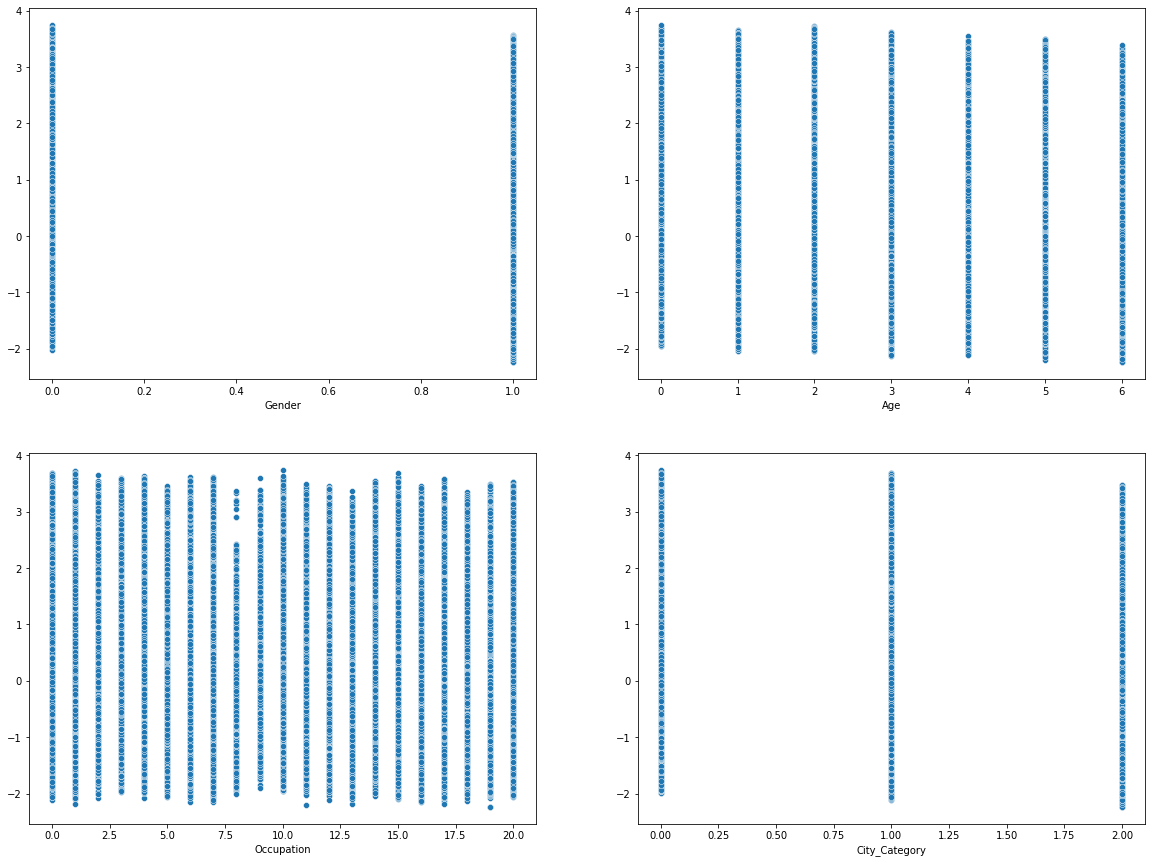

In [87]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], OLS_model.resid , ax=subplot)

# display the plot
plt.show()

In [ ]:
#Interpretation: The above plots show no specific pattern, implies that there is a linearity present in the data.

In [ ]:
# Autocorrelation

In [88]:
# print the model summary
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Purchase   R-squared (uncentered):                   0.130
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              8194.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:33:36   Log-Likelihood:                     -5.9387e+05
No. Observations:              440054   AIC:                                  1.188e+06
Df Residuals:                  440046   BIC:                                  1.188e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
#Interpretation: From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 1.981).
#Thus, we conclude that there is no autocorrelation.

In [ ]:
# Heteroskedasticity -

In [89]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(OLS_model.resid, OLS_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 21411.161249079993), ('p-value', 0.0)]

In [ ]:
# Test of normality

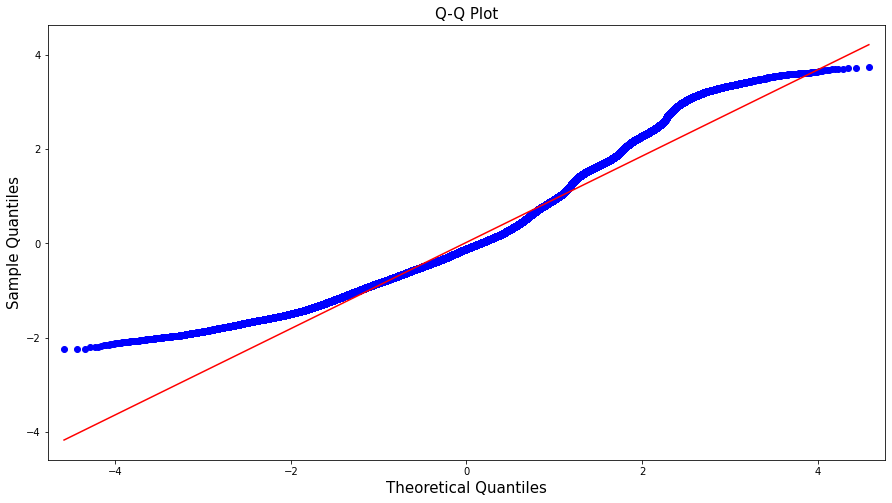

In [90]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(OLS_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# Interpretation: The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, 
#we conclude that the residuals do not follow a normal distribution.

In [93]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205


In [85]:
train_pred = MLR_model.predict(X_train)

mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
rmse_train

0.9285

# Build MLR model using SGD method.

In [94]:

sgd = SGDRegressor(random_state = 10)

linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.9425
RMSE on test set: 0.9408


In [95]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958


# Ridge Regression

#### Build regression model using Ridge Regression for alpha = 1.

In [96]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.9267


In [97]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979


#### Build regression model using Ridge Regression for alpha = 2.

In [98]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.9267


In [99]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962


# Lasso Regression

In [100]:
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.9272


In [101]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910


In [102]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
print(df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

Insignificant variables obtained from Lasso Regression when alpha is 0.01
['Marital_Status', 'Stay_In_Current_City_Years']


# Elastic Net Regression

In [103]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.9269


In [104]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230


# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'mse', random_state = 10)
decision_tree = dtr.fit(X_train,y_train)

In [106]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'decision_tree', model = decision_tree)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251


# RandomForestRegressor

In [107]:
rf_Regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_Regressor.fit(X_train, y_train)

In [108]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'RandomForestRegressor', model = rf_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337


# AdaBoost

In [109]:
ada_model = AdaBoostRegressor(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=40, random_state=10)

In [110]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'AdaBoost model', model = ada_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# GradientBoosting

In [111]:
gboost_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, random_state=10)

In [112]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GradientBoosting model', model = gboost_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# XGBRegressor

In [113]:
xgb_model = XGBRegressor(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

[12:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=1, max_depth=10)

In [114]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'XGBRegressor model full', model = xgb_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# Recursive Feature Elimination (RFE)

In [115]:
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_2'], dtype='object')


# Train test split for rfe

In [116]:
X1=df_dummy[['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_2']]

In [117]:
X1.head()

,Gender,City_Category,Product_Category_1,Product_Category_2
0,0,0,2,3
1,0,0,0,5
2,0,0,11,13
3,0,0,11,13
4,1,2,7,13


In [118]:
# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_tar - df_tar.mean()) / df_tar.std()


In [119]:
# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_tar - df_tar.mean()) / df_tar.std()


In [120]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (440054, 4)
y_train (440054,)
X_test (110014, 4)
y_test (110014,)


#  Multiple Linear Regression (OLS)

#### Build a MLR model on a training dataset.

In [121]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.13670687418941196

In [122]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression rfe', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


In [123]:
train_pred = MLR_model.predict(X_train)

mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
rmse_train

0.9292

# Build MLR model using SGD method.

In [124]:

sgd = SGDRegressor(random_state = 10)

linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.9438
RMSE on test set: 0.9412


In [125]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)rfe', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# Ridge Regression

#### Build regression model using Ridge Regression for alpha = 1.

In [126]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.9275


In [127]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)rfe', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


#### Build regression model using Ridge Regression for alpha = 2.

In [128]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.9275


In [129]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)rfe', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# Lasso Regression

In [130]:
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.9279


In [131]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression rfe', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# Elastic Net Regression

In [132]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.9277


In [133]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression rfe', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# Decision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'mse', random_state = 10)
decision_tree = dtr.fit(X_train,y_train)

In [135]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'decision_tree rfe', model = decision_tree)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# RandomForestRegressor

In [136]:
rf_Regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_Regressor.fit(X_train, y_train)

In [137]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'RandomForestRegressor rfe', model = rf_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# AdaBoost

In [138]:
ada_model = AdaBoostRegressor(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=40, random_state=10)

In [139]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'AdaBoost  model rfe', model = ada_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# GradientBoosting

In [141]:
gboost_model = GradientBoostingRegressor(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=10)

In [142]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GradientBoosting model rfe', model = gboost_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# XGBRegressor

In [143]:
xgb_model = XGBRegressor(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

[12:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=1, max_depth=10)

In [144]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'XGBRegressor model rfe', model = xgb_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


# RandomForest using Gridsearch CV

In [145]:

tuned_paramaters = [{'criterion': ['mse'],
                     'n_estimators': [10, 30],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8],
                     'min_samples_leaf': [2, 5, 9],
                     'max_leaf_nodes': [2, 5, 8]}]

In [146]:
random_forest_regression = RandomForestRegressor(random_state = 10)

In [ ]:
rf_grid = GridSearchCV(estimator = random_forest_regression, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

In [ ]:
rf_grid_model = rf_grid.fit(X_train, y_train)

In [42]:
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30} 



In [147]:
random_forest_tuned = RandomForestRegressor(criterion= 'mse', 
                                                 max_depth = 10, max_features = 'sqrt', 
                                                 max_leaf_nodes = 8, min_samples_leaf = 2, 
                                                 min_samples_split = 2, n_estimators = 30 )

In [148]:
rf_tuned_model = random_forest_tuned.fit(X_train,y_train)

In [149]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Random forest model rfe (Gridsearch CV)', model = rf_tuned_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


In [ ]:
# XGB using Gridsearch CV

In [50]:
tuning_parameters = {'learning_rate': [ 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,7),
                     'gamma': [ 2, 3, 4]}


xgb_model = XGBRegressor(objective ='reg:squarederror')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate': 0.3, 'max_depth': 3} 



In [150]:
xgb_tuned_model = XGBRegressor(gamma= 2, learning_rate= 0.3, max_depth = 3)

In [151]:
xgb_tuned_model = xgb_tuned_model.fit(X_train,y_train)

[12:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [154]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'XGB model rfe (Gridsearch CV)', model = xgb_tuned_model)

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_rmse,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
1,Linear Regression,-,-,0.137929,0.137911,0.928500,0.926700,108.767205
2,Linear Regression (using SGD),-,-,0.111667,0.111649,0.942500,0.940800,111.262958
3,Ridge Regression (with alpha = 1),1,-,0.137875,0.137858,0.928500,0.926700,108.549979
4,Ridge Regression (with alpha = 2),2,-,0.137875,0.137858,0.928500,0.926700,108.549962
5,Lasso Regression,0.01,-,0.137076,0.137058,0.929000,0.927200,107.685910
6,Elastic Net Regression,0.1,0.01,0.137522,0.137504,0.928700,0.926900,108.010230
7,decision_tree,-,-,0.741514,0.741508,0.508400,0.620500,113.696251
8,RandomForestRegressor,-,-,0.732471,0.732466,0.517300,0.600400,111.812337
9,AdaBoost model,-,-,0.459448,0.459437,0.735200,0.734200,108.323767


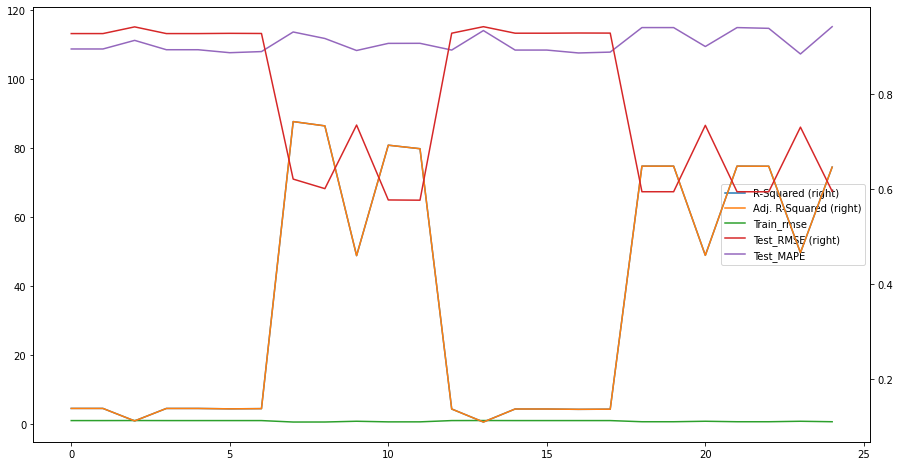

In [153]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared','Test_RMSE','Test_RMSE'])

# display just the plot
plt.show()